<a href="https://colab.research.google.com/github/DatDoc/CS114.K21.KHTN/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHÂN TÍCH CẢM XÚC (SENTIMENT ANALYSIS)


## Giới thiệu


### Đặt vấn đề
Với sự phát triển của các trang buôn bán điện tử ngày nay thì việc thu thập đánh giá từ các bình luận của người dùng là rất cần thiết. Các bình luận của người dùng giúp cho các trang web dễ dàng lọc, đề xuất các mặt hàng, địa điểm phù hợp với từng người dùng và đánh giá chất lượng dịch vụ của các đối tác. Với hàng chục nghìn cho tới hàng trăm nghìn bình luận mỗi ngày hiện nay thì việc phân loại (tốt, xấu) cho các bình luận từ người dùng không phải là điều dễ dàng cần đòi hỏi rất nhiều nhân lực. Cùng sự phát triển của AI, hiện nay chúng ta có thể giải quyết bài toán này bằng các mô hình học sâu với độ chính xác cao tương đương với con người

![](https://storage.googleapis.com/vietai/comments.png)

### Bài toán cụ thể


- Trong assignment này, chúng ta tiếp cận bài toán phân tích cảm xúc (Sentiment Analysis) thông qua tập dữ liệu chứa các bình luận được crawl trực tiếp từ foody. Nếu nhìn theo kiểu black box, đầu vào của bài toán là một câu hoặc đoạn văn bản và đầu ra là trạng thái tích cực, tiêu cực hay trung hoà (positive - negative - neutral). Trong phạm vi của assignment này, chúng ta chỉ quan tâm đến hai trạng thái cảm xúc là positive và negative.

![caption](https://drive.google.com/uc?export=view&id=1cg-W4IXMKP9jfpCcADKXqXwpgEV19I-f)

- Dataset chứa hơn 61.870 bình luận và điểm đánh giá của mỗi bình luận đó trên thang điểm từ 0.0 đến 10.0. Download bộ dữ liệu tại https://github.com/DatDoc/CS114.K21.KHTN/tree/master/sentiment_analysis

>>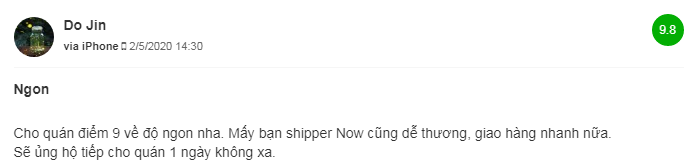

- Để bộ dữ liệu phù hợp với bài toán là đánh giá cảm xúc tiêu cực hay tích cực, nên trong bước tiền xử lý dữ liệu, các bình luận được đánh giá >= 8.0 thì sẽ được gán nhãn tích cực (1), các bình luận được đánh giá <= 5.0 thì được gán nhãn tiêu cực (0). Do đó số lượng bình luận trong bộ dữ liệu sẽ bị giảm xuống còn 34.985 bình luận bao gồm 8366 bình luận tiêu cực và 53504 bình luận tích cực.

- Các bước thực hiện bao gồm:

>1.   Tiền xử lý dữ liệu (preprocessing)
2.   Đúc trích đặc trưng (Feature Engineering)
3.   Lựa chọn thuật toán máy học
4.   Cài đặt, tinh chỉnh tham số
5.   Đánh giá kết quả, kết luận






 




## Xây dựng kế hoạch giải quyết bài toán

#### Phân tích bài toán dưới góc nhìn Word Vectors

Nếu như chúng ta giữ nguyên định dạng đầu vào là chuỗi ký tự thì rất khó để thực hiện các thao tác biến đổi như tích vô hướng (dot product) hoặc các thuật toán trên mạng neural network như backpropagation. Thay vì dữ liệu đầu vào là một chuỗi, chúng ta cần chuyển đổi các từ trong tập từ điển sang dạng vector số học trong đó có thể thực hiện được các phép toán nêu trên.

![Word2Vec](https://drive.google.com/uc?export=view&id=12xKP6pFzDzj-0ToZX-27RjOhRcMFrfeb)

Trong hình minh hoạ ở trên, ta có thể hình dung dữ liệu đầu vào của thuật toán phân tích cảm xúc là một ma trận 16 x D chiều. Trong đó 16 là số lượng từ trong câu và D là số chiều của không gian vector để biểu diễn từ. Để ánh xạ từ một từ sang một vector, chúng ta sử dụng ma trận word embedding như đã thực hiện.

#### Phân tích bài toán dưới góc nhìn TF IDF

TF-IDF (Term Frequency – Inverse Document Frequency) là 1 kĩ thuật sử dụng trong khai phá dữ liệu văn bản. Trọng số này được sử dụng để đánh giá tầm quan trọng của một từ trong một văn bản. Giá trị cao thể hiện độ quan trọng cao và nó phụ thuộc vào số lần từ xuất hiện trong văn bản nhưng bù lại bởi tần suất của từ đó trong tập dữ liệu. Một vài biến thể của tf-idf thường được sử dụng trong các hệ thống tìm kiếm như một công cụ chính để đánh giá và sắp xếp văn bản dựa vào truy vấn của người dùng.  Tf-idf cũng được sử dụng để lọc những từ stopwords trong các bài toán như tóm tắt văn bản và phân loại văn bản.

### Cài đặt các thư viện


In [ ]:
pip install underthesea

In [ ]:
pip install emoji

In [ ]:
pip install flask-ngrok

In [ ]:
pip install vncorenlp

In [ ]:
%%shell
mkdir -p vncorenlp/models/wordsegmenter
wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
mv VnCoreNLP-1.1.1.jar vncorenlp/ 
mv vi-vocab vncorenlp/models/wordsegmenter/
mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

In [ ]:
import os
os.chdir('/content')

In [ ]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("./vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 
# rdrsegmenter = VnCoreNLP("/content/drive/My Drive/BERT/SA/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

input = "Đại học Bách Khoa Hà Nội. Mì quảng ngon"

word_segmented_text = rdrsegmenter.tokenize(input) 
print(word_segmented_text)

[['Đại_học', 'Bách_Khoa', 'Hà_Nội', '.'], ['Mì', 'quảng', 'ngon']]


### Import các thư viện cần thiết

In [ ]:
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import io
from vncorenlp import VnCoreNLP
from underthesea import word_tokenize
import re
import string
import codecs
import itertools
import emoji
import pickle
from flask import Flask, render_template
from flask_ngrok import run_with_ngrok

## Phân tích dữ liệu

### Load tập dữ liệu 


In [ ]:
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/sentiment_analysis/foody-dataset.xlsx")
print(df.head(10))
print(df.shape)

                                            comments  ratings
0                                      Mì quảng ngon     10.0
1  Quán sạch sẽ, chủ quán vui vẻ, giá rất ok Mình...     10.0
2  Trời sg mấy nay nóng bức ko muốn ăn cơm, thấy ...      7.4
3     Ngon, vừa tiền, hương vị đậm chất miền trung,,      8.6
4  Bơ đúng ngon. Nghe đâu bơ quê siêu sạch không ...     10.0
5  Nghỉ tết dài hạn , nay vào lại tp nên đặt món ...      7.6
6  Quán làm ăn có tâm. Hôm nay mình order bánh tr...      9.2
7  Quán xá ở Tân Phú đóng cửa hết rồi, may mắn Ta...     10.0
8  Mì quảng ngon, mít trộn ngon, bánh tráng thịt ...     10.0
9  Mình order 2 lần rồi. mít trộn và bánh tráng t...      9.2
(61870, 2)


### Loại bỏ các bình luận có điểm số > 5.0 và < 8.0 và gán nhãn tích cực(1) cho những bình luận >= 8.0, tiêu cực(0) cho những bình luận <= 5.0

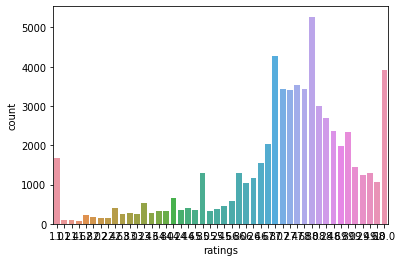

In [ ]:
# visualize data
ax = sns.countplot(x='ratings', data=df)

In [ ]:
df = df[(df["ratings"] >= 0.0)] # remove the neutral comments (5 < x < 8)
df.loc[df["ratings"] <= 5, "ratings"] = 0
df.loc[(df["ratings"] > 5) & (df["ratings"] < 8), "ratings"] = 1
df.loc[df["ratings"] >= 8, "ratings"] = 2
df["ratings"] = df["ratings"].astype(int)

df.reset_index(inplace=True)
df = df.drop("index", axis= 1)
print(df.head(10))
print(df.shape)

                                            comments  ratings
0                                      Mì quảng ngon        2
1  Quán sạch sẽ, chủ quán vui vẻ, giá rất ok Mình...        2
2  Trời sg mấy nay nóng bức ko muốn ăn cơm, thấy ...        1
3     Ngon, vừa tiền, hương vị đậm chất miền trung,,        2
4  Bơ đúng ngon. Nghe đâu bơ quê siêu sạch không ...        2
5  Nghỉ tết dài hạn , nay vào lại tp nên đặt món ...        1
6  Quán làm ăn có tâm. Hôm nay mình order bánh tr...        2
7  Quán xá ở Tân Phú đóng cửa hết rồi, may mắn Ta...        2
8  Mì quảng ngon, mít trộn ngon, bánh tráng thịt ...        2
9  Mình order 2 lần rồi. mít trộn và bánh tráng t...        2
(61853, 2)


1    26868
2    26619
0     8366
Name: ratings, dtype: int64


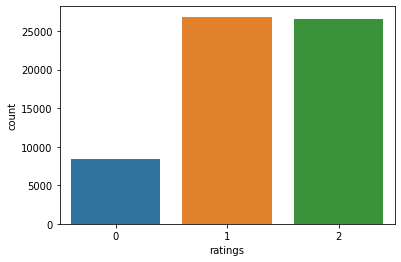

In [ ]:
sns.countplot(x='ratings', data=df)
print(df['ratings'].value_counts())

### Tiền xử lý dữ liệu

* Dữ liệu bình luận (văn nói) nên người dùng thường không quan 
tâm đến chữ hoa thường khi gõ, đưa hết về lower case.
* Loại bỏ những ký tự kéo dài: Ví dụ: Áo đẹp quáaaaaaaa--> Áo đẹp quá.
* Tiếng Việt có 2 cách bỏ dấu nên đưa về 1 chuẩn. Ví dụ, chữ "Hòa" và "Hoà" đều được chấp nhận trong tiếng Việt. Ngoài ra còn một số trường hợp lỗi font chữ cũng cần chuẩn hóa lại. (các trường hợp dính chữ như: "Giao hàngnhanh" xử ý đc sẽ tốt hơn).
* Chuẩn hóa một số sentiment word: "okie"-->"ok", "okey"-->"ok", authentic--> "chuẩn chính hãng",vv...
* Emoj quy về 2 loại: emojs mang ý nghĩa tích cực (positive): '💯','💗' và emojs mang nghĩa tiêu cực (negative): '👎','😣'.
* Loại bỏ dấu câu (puntuations) và các ký tự nhiễu.
* Xử lý vấn đề phủ định, TF-IDF không xử lý được vấn đề phủ định trong bài toán sentiment. Ví dụ: Cái áo này rất đẹp và Cái áo này chẳng đẹp sẽ không khác nhau nhiều khi chọn feature tf-idf, giải pháp của mình là biến chẳng đẹp thành not-positive, hay không tệ thành not-negative bằng cách dùng từ điển phủ định. 
Augmentation data bằng cách thêm vào các sample của chính tập train nhưng không dấu. (Bình luận không dấu khá phổ biến).
* Ngoài ra, mình bổ sung vào tập train các sample mới lấy từ chính 2 từ điển positive và negative. Các từ vựng trong từ điển tích cực gán nhãn 0, các từ vựng từ từ điển tiêu cực gán nhãn 1.


#### Loại bỏ các ký tự lặp lại

In [ ]:
def remove_repeat_char(text):
  text = re.compile(r'(.)\1{1,}', re.IGNORECASE).sub(r'\1', str(text))
  return text

In [ ]:
input = "Món này ngon quáaaaaaaaa :)) Trà sữa thì không tệ 🧋 <3 \n. Mời các bạn ghé thăm quán tại trang web foody.com"
input = remove_repeat_char(input)
print(input)

Món này ngon quáa :) Trà sữa thì không tệ 🧋 <3 
. Mời các bạn ghé thăm quán tại trang web fody.com


#### Chuẩn hóa về ký tự in thường

In [ ]:
def lowercase(text):
  return text.lower()

In [ ]:
input = lowercase(input)
print(lowercase(input))

món này ngon quáa :) trà sữa thì không tệ 🧋 <3 
. mời các bạn ghé thăm quán tại trang web fody.com


#### Chuẩn hóa dấu câu và từ viết tắt trong Tiếng Việt

In [ ]:
def normalize_word(text):
  replace_list = {
        #Chuẩn hóa các kí tự kéo dài đặc biệt vd : quáaaaaa -> quá
        'íi' : 'í', 'ìi' : 'ì', 'ỉi' : 'ỉ', 'ĩi':'ĩ', 'áa':'á', 'àa' : 'à', 'ảa' : 'ả', 'ãa' : 'ã', 'âa' :'â', 'ầa' : 'ầ', 'ấa' : 'ấ', 'ẩa' : 'ẩ', 'ẫa' : 'ẫ',
        'ée' : 'é' , 'èe' : 'è', 'ẻe' : 'ẻ', 'ẽe' : 'ẽ' , 'êe' : 'ê', 'ếe' : 'ế', 'ềe' : 'ề', 'ểe' : 'ể', 'ễe' : 'ễ', 'ềê' : 'ề', 'ếê' : 'ế', 'ểê' : 'ể', 'ễê' : 'ễ',
        'ôo' : 'ô', 'ồo' : 'ồ' , 'ốo' : 'ố', 'ồo' : 'ồ' , 'ổo':'ổ', 'ỗo' : 'ỗ', 'ồô' : 'ồ', 'ốô' : 'ố', 'ổô' : 'ổ', 'ỗô' : 'ỗ',
        'ờo' : 'ờ', 'ớo' :'ớ', 'ởo' : 'ở', 'ỡo' : 'ỡ', 'ờơ' : 'ờ', 'ớơ' : 'ớ', 'ởơ' : 'ở', 'ỡơ' : 'ỡ',
        'ùu' :'ù', 'úu' : 'ú', 'ủu' :'ủ', 'ũu' : 'ũ', 'ừư' : 'ừ', 'ứư' : 'ứ', 'ửư' : 'ử', 'ữư' : 'ữ',
        'ýy' :'ý', 'ỳy' : 'ỳ', 'ỷy' : 'ỷ', 'ỹy' : 'ỹ',
        #Chuẩn hóa các vị trí của dấu câu
        'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
        'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
        'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
        'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
        'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
        #Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cực
        "👹": " negative ", "👻": " positive ", "💃": " positive ",'🤙': ' positive ', '👍': ' positive ', '🥰' : " positive ", "=)" : ' positive ',
        "💄": " positive ", "💎": " positive ", "💩": " positive ","😕": " negative ", "😱": " negative ", "😸": " positive ",
        "😾": " negative ", "🚫": " negative ",  "🤬": " negative ","🧚": " positive ", "🧡": " positive ",'🐶': ' positive ',
        '👎': ' negative ', '😣': ' negative ','✨': ' positive ', '❣': ' positive ','☀': ' positive ', '😅' : ' positive ',
        '♥': ' positive ', '🤩': ' positive ', 'like': ' positive ', '💌': ' positive ', '^^' : ' positive ',
        '🤣': ' positive ', '🖤': ' positive ', '🤤': ' positive ', ':(': ' negative ', '😢': ' negative ',
        '❤': ' positive ', '😍': ' positive ', '😘': ' positive ', '😪': ' negative ', '😊': ' positive ',
        '?': ' ? ', '😁': ' positive ', '💖': ' positive ', '😟': ' negative ', '😭': ' negative ',
        '💯': ' positive ', '💗': ' positive ', '♡': ' positive ', '💜': ' positive ', '🤗': ' positive ',
        '^^': ' positive ', '😨': ' negative ', '☺': ' positive ', '💋': ' positive ', '👌': ' positive ',
        '😖': ' negative ', '😀': ' positive ', ':(': ' negative ', '😡': ' negative ', '😠': ' negative ',
        '😒': ' negative ', '🙂': ' positive ', '😏': ' negative ', '😝': ' positive ', '😄': ' positive ',
        '😙': ' positive ', '😤': ' negative ', '😎': ' positive ', '😆': ' positive ', '💚': ' positive ',
        '✌': ' positive ', '💕': ' positive ', '😞': ' negative ', '😓': ' negative ', '️🆗️': ' positive ',
        '😉': ' positive ', '😂': ' positive ', ':v': '  positive ', '=)': '  positive ', '😋': ' positive ', ':-)' : ' positive ', ':)': '  positive ', ':>': ' positive ', ':-]' : ' positive ' ,
        '💓': ' positive ', '😐': ' negative ', ':3': ' positive ', '😫': ' negative ', '😥': ' negative ',
        '😃': ' positive ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' positive ', '🤝': ' positive ', '🎈': ' positive ',
        '😗': ' positive ', '🤔': ' negative ', '😑': ' negative ', '🔥': ' negative ', '🙏': ' negative ',
        '🆗': ' positive ', '😻': ' positive ', '💙': ' positive ', '💟': ' positive ',
        '😚': ' positive ', '❌': ' negative ', '👏': ' positive ', ';)': ' positive ', '<3': ' positive ',
        '🌝': ' positive ',  '🌷': ' positive ', '🌸': ' positive ', '🌺': ' positive ',
        '🌼': ' positive ', '🍓': ' positive ', '🐅': ' positive ', '🐾': ' positive ', '👉': ' positive ',
        '💐': ' positive ', '💞': ' positive ', '💥': ' positive ', '💪': ' positive ',
        '💰': ' positive ',  '😇': ' positive ', '😛': ' positive ', '😜': ' positive ',
        '🙃': ' positive ', '🤑': ' positive ', '🤪': ' positive ','☹': ' negative ',  '💀': ' negative ',
        '😔': ' negative ', '😧': ' negative ', '😩': ' negative ', '😰': ' negative ', '😳': ' negative ',
        '😵': ' negative ', '😶': ' negative ', '🙁': ' negative ',
        #Chuẩn hóa 1 số sentiment words/English words
        'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
        'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ', 'okela' : ' ok ', 
        ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
        '⭐': ' star ', '*': ' star ', '🌟': ' star ', '🎉': u' positive ', 'great' : u' tuyệt ',
        'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ', 'khôg' : u' không ',
        'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ', 'hí hí': ' positive ', 'ha ha':' positive ','hi hi' : 'positive',
        ' lol ': ' negative ',' cc ': ' negative ', ' đm ': ' negative ','cute': u' dễ thương ','huhu': ' negative ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
        ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ', 
        'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
        'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
        'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
        'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ', 'chil' : ' thư giản ',
        'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': ' hoàn hảo ', 'bad': ' tệ ','fresh': ' tươi ','sad': ' tệ ',
        'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
        'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ', 'ord' : ' đặt hàng ',
        'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ', 
        'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ','qủa' : u' quả ' ,u'quả ng ':u' quảng ',
        'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', '&' : ' và ', 'cool' : u' tuyệt ', 'tsua' : ' trà sữa ', 'mn' : ' mọi người ',
        'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ', 'bil' : u' hóa đơn ', 'awesome' : ' tuyệt vời ', 
        ' por ': u' tệ ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ', 'awful' : u' tệ ', 'hssv' : ' học sinh sinh viên ', 'cofe' : ' cà phê '
        }

  for k, v in replace_list.items():
    text = text.replace(k, v)
  return text

In [ ]:
input = normalize_word(input)
print(input)

món này ngon quá   positive  trà sữa thì không tệ 🧋  positive  
. mời các bạn ghé thăm quán tại trang web fody.com


#### Loại bỏ các ký tự trong HTML

In [ ]:
def remove_html(text):
  HTML_TAGS = p = re.compile(r'<.*?>')
  text = HTML_TAGS.sub("", text)
  return text

In [ ]:
input = remove_html(input)
print(input)

món này ngon quá   positive  trà sữa thì không tệ 🧋  positive  
. mời các bạn ghé thăm quán tại trang web fody.com


#### Loại bỏ các punctuations

In [ ]:
def remove_punctuation(text):
  remove_punc = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
  text = text.translate(remove_punc)
  return text

In [ ]:
input = remove_punctuation(input)
print(input)

món này ngon quá   positive  trà sữa thì không tệ 🧋  positive  
  mời các bạn ghé thăm quán tại trang web fody com


#### Loại bỏ các emoji không cần thiết

In [ ]:
import re
import sys
def remove_emoji(text):
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text)
  return text

In [ ]:
input = remove_emoji(input)
print(input)

món này ngon quá   positive  trà sữa thì không tệ   positive  
  mời các bạn ghé thăm quán tại trang web fody com


#### Chuẩn hóa các tù phủ định (EX: món này không tệ -> món này notneg)

In [ ]:
def normalize_negword(text):
  #Từ điển tích cực, tiêu cực, phủ định
  path_neg = '/content/drive/My Drive/Colab Notebooks/sentiment_analysis/sentiment_dicts/neg.txt'
  path_pos = '/content/drive/My Drive/Colab Notebooks/sentiment_analysis/sentiment_dicts/pos.txt'
  path_not = '/content/drive/My Drive/Colab Notebooks/sentiment_analysis/sentiment_dicts/not.txt'

  with codecs.open(path_neg, 'r', encoding='UTF-8') as f:
      neg = f.readlines()

  neg_list = [n.replace('\r', '').replace('\n','') for n in neg]

  with codecs.open(path_pos, 'r', encoding='UTF-8') as f:
      pos = f.readlines()
  pos_list = [n.replace('\r', '').replace('\n','') for n in pos]


  with codecs.open(path_not, 'r', encoding='UTF-8') as f:
      not_ = f.readlines()

  not_list = [n.replace('\r', '').replace('\n','') for n in not_]
  texts = text.split()
  len_text = len(texts)

  texts = [t.replace('_', ' ') for t in texts]
  for i in range(len_text):
    cp_text = texts[i]
    if cp_text in not_list: # Xử lý vấn đề phủ định (VD: áo này chẳng đẹp--> áo này notpos)
      if i + 1 < len_text:
        if texts[i+1] in pos_list:
          texts[i] = 'notpos'
          texts[i+1] = ''
        if texts[i+1] in neg_list:
          texts[i] = 'notneg'
          texts[i+1] = ''
    else: #Thêm feature cho những sentiment words (áo này đẹp--> áo này đẹp positive)
      if cp_text in pos_list:
        texts.append('positive')
      elif cp_text in neg_list:
        texts.append('negative')

    text = u' '.join(texts)
  return text

In [ ]:
input = normalize_negword(input)
print(input)

món này ngon quá positive trà sữa thì notneg  positive mời các bạn ghé thăm quán tại trang web fody com positive


In [ ]:
def no_accent(s):
    s = re.sub(r'[àáạảãâầấậẩẫăằắặẳẵ]', 'a', s)
    s = re.sub(r'[ÀÁẠẢÃĂẰẮẶẲẴÂẦẤẬẨẪ]', 'A', s)
    s = re.sub(r'[èéẹẻẽêềếệểễ]', 'e', s)
    s = re.sub(r'[ÈÉẸẺẼÊỀẾỆỂỄ]', 'E', s)
    s = re.sub(r'[òóọỏõôồốộổỗơờớợởỡ]', 'o', s)
    s = re.sub(r'[ÒÓỌỎÕÔỒỐỘỔỖƠỜỚỢỞỠ]', 'O', s)
    s = re.sub(r'[ìíịỉĩ]', 'i', s)
    s = re.sub(r'[ÌÍỊỈĨ]', 'I', s)
    s = re.sub(r'[ùúụủũưừứựửữ]', 'u', s)
    s = re.sub(r'[ƯỪỨỰỬỮÙÚỤỦŨ]', 'U', s)
    s = re.sub(r'[ỳýỵỷỹ]', 'y', s)
    s = re.sub(r'[ỲÝỴỶỸ]', 'Y', s)
    s = re.sub(r'[Đ]', 'D', s)
    s = re.sub(r'[đ]', 'd', s)
    return s


#### Tách từ

In [ ]:
def word_segmentation(text):
  # text = rdrsegmenter.tokenize(text)
  # text = ' '.join([' '.join(x) for x in text])
  text = word_tokenize(text, format="text")
  return text

In [ ]:
input = word_segmentation(input)
print(input)

món này ngon quá positive trà sữa thì notneg positive mời các bạn ghé thăm quán tại trang_web fody com positive


In [ ]:
# -*- coding: utf-8 -*-


def normalize_text(text):
      
    #Remove các ký tự kéo dài: vd: đẹppppppp
    text = remove_repeat_char(text)
    
    #lowercase the text
    text = lowercase(text)

    #normalize word
    text = normalize_word(text)
    

    #remove HTML_tags
    text = remove_html(text)

    # remove extra spaces between words
    text = " ".join(text.split()) 
    
    #remove punctuations
    text = remove_punctuation(text)
  
    # remove unwanted emojis
    text = remove_emoji(text)

    #normalize negative word
    text = normalize_negword(text)

    #word segmentation   
    text = word_segmentation(text)
    return text

In [ ]:
def transform_to_dataset(x_set, y_set):
  X, y = [], []
  for comment, rating in zip(x_set, y_set):
      comment = normalize_text(comment)
      X.append(comment)
      y.append(rating)
      #Augmentation bằng cách remove dấu tiếng Việt
      X.append(no_accent(comment))
      y.append(rating)
  return X, y

## Đúc trích đặc trưng (Feature engineering)


### Chia dữ liệu thành train, validation và test

Chia dữ liệu thành 2 tập **train : validation = 0.7 : 0.3**




In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df.comments, df.ratings, test_size=0.3,random_state=42)
X_train, y_train = transform_to_dataset(X_train, y_train)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val, y_val = transform_to_dataset(X_val, y_val)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
print(X_train.shape)
print(X_train[0:10])
print(X_val.shape)
print(X_val[0:10])

(86594,)
['tuần vừa_rồi đúng dịp về phan_thiết chơi thế_là tình_cờ thấy wow trên facebok và quyết_định kéo cả hội chị_em đến ăn thử ta nói quả không ngoài mong_đợi quán có không_gian rộng_rãi đặc_biệt trang_trí lúc về đêm cực_kì lung_linh làm mình rất ấn_tượng về đồ_ăn thì khỏi phải nói đúng là ăn hải_sản tại vùng_biển thì ngon hết_sẩy hải_sản tươi ngon_ngọt_lịm ăn cực đã đã thế các loại thịt ở đây nào là bò heo được tẩm ướp gia_vị rất vừa ăn ngon notneg gì các nhà_hàng bufet ở xài gòn mình đã từng thử cả hơn nữa quán còn fre bia và nước_ngọt ăn nướng đã đời làm thêm nổi lẩu riêu_cua món đặc_trưng của quán uống nước cac loại thoải_mái mà không phát_sinh chi_phí gì cả với mức giá hiện_tại mình nghĩ wow cực_kì xứng_đáng là điểm ăn_uống hàng_đầu bạn nên đưa vào cẩm_nang du_lịch phan_thiết thật_sự mình và hội chị_em đều khen không ngớt vô_cùng hài lòg với số tiền mình bỏ ra cho một bữa ăn cực_kì chất_lượng tự_nhủ với lòng là liên_hoan công_ty đợt sau nhất_định nhất_định phải quay lại wow t

In [ ]:
def get_stopwords(documents, threshold=3):
    """
    :param documents: list of documents
    :param threshold:
    :return: list of words has idf <= threshold
    """
    tfidf = TfidfVectorizer(min_df=100)
    tfidf_matrix = tfidf.fit_transform(documents)
    features = tfidf.get_feature_names()
    stopwords = []
    print(min(tfidf.idf_), max(tfidf.idf_), len(features))
    for index, feature in enumerate(features):
        if tfidf.idf_[index] <= threshold:
            stopwords.append(feature)
    return stopwords

In [ ]:
stop_words = get_stopwords(X_train)

1.0813802840866362 7.753876839321884 3415


In [ ]:
print(stop_words)

['an', 'ban', 'cho', 'co', 'con', 'cua', 'cung', 'còn', 'có', 'cũng', 'day', 'de', 'den', 'di', 'do', 'duoc', 'goi', 'hay', 'hoi', 'hơi', 'kha', 'khi', 'khong', 'khá', 'không', 'la', 'lai', 'lam', 'lan', 'luon', 'là', 'lại', 'lắm', 'ma', 'minh', 'moi', 'mon', 'mà', 'mình', 'món', 'nay', 'negative', 'nen', 'ngay', 'ngon', 'nhieu', 'nhiều', 'nhu', 'nhung', 'như', 'nhưng', 'notpos', 'này', 'nên', 'positive', 'qua', 'quan', 'quay', 'quá', 'quán', 'ra', 'rat', 'rất', 'thay', 'thi', 'thì', 'thấy', 'trong', 'va', 'vi', 'voi', 'và', 'với', 'ăn', 'đi', 'đây', 'được']


### **TF-IDF**

#### explain the code

In [ ]:
tf = TfidfVectorizer()
tf.fit(X_train)
print("Size of the vocabulary: " + str(len(tf.vocabulary_)))
vector_train = tf.transform(X_train)
vector_val = tf.transform(X_val)
print("print 10 words from the vocabulary")
vocab = {k: tf.vocabulary_[k] for k in list(tf.vocabulary_)[:10]}
print(vocab)

rr = dict(zip(tf.get_feature_names(), tf.idf_))
print(dict(zip(tf.get_feature_names()[:10], tf.idf_)))

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight 

sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

KeyboardInterrupt: ignored

#### Lựa chọn thuật toán máy học

In [ ]:
#Try some models
classifiers = [
            #MultinomialNB(),
            DecisionTreeClassifier(),
            LogisticRegression(),
            #SVC(),
            LinearSVC(),
        ]
model = []
for classifier in classifiers:
    clf = classifier
    print(clf)
    model.append(clf.fit(vector_train, y_train))
    y_pred = clf.predict(vector_val)
    report = metrics.classification_report(y_val, y_pred, labels=[0, 1, 2], digits=3)
    print(report)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0      0.516     0.474     0.494      5024
           1      0.533     0.539     0.536     16188
           2      0.563     0.571     0.567     15900

    accuracy                          0.544     37112
   macro avg      0.537     0.528     0.532     37112
weighted avg      0.544     0.544     0.544     37112

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0      0.790     0.686     0.735      5024
           1      0.670     0.689     0.679     16188
           2      0.705     0.714     0.709     15900

    accuracy                          0.699     37112
   macro avg      0.722     0.696     0.708     37112
weighted avg      0.701     0.699     0.700     37112

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

           0      0.762     0.668     0.712      5024
           1      0.658     0.669     0.663     16188
           2      0.689     0.705     0.697     15900

    accuracy                          0.684     37112
   macro avg      0.703     0.681     0.691     37112
weighted avg      0.686     0.684     0.684     37112



#### Load tập test và tiền xử lý


In [ ]:
new_df1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sentiment_analysis/hcm-quan12.csv")
new_df1.drop(["web-scraper-order", "web-scraper-start-url", "links", "links-href"], axis = 1, inplace=True)
print(new_df1)

                                              comments  ratings
0    Sữa chua nếp cẩm siêu ngon, dẻo. Ăn mê luôn nà...      8.0
1    Lẩu gà ớt hiểm ở đây cứ phải nói là ngon quên ...      8.8
2    Lần đầu ăn buffet nướng hài lòng đến vậy. Từ n...      8.8
3    Mình đã ăn mì cay Sasin nhiều chi nhánh khác n...      4.6
4    Mình với con bạn có ghé vào cafe thử, ở đây th...      7.6
..                                                 ...      ...
929              Đồ ăn giao đến còn nóng ăn ngon ahihi      7.0
930  Ghé quán tối chủ nhật. Được 1 anh chắc là chủ ...      8.6
931  - hôm nay quán có món mới, ăn cũng ngon và lạ ...      9.0
932  Bữa có ghé dịp Tất Niên Công Ty , Nói ch...      9.2
933  bánh ở đây phong phú và giá cả phải chăng.phục...      7.6

[934 rows x 2 columns]


In [ ]:
new_df2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sentiment_analysis/namdinh.csv")
new_df2.drop(["web-scraper-order", "web-scraper-start-url", "links", "links-href"], axis = 1, inplace=True)
print(new_df2)

                                              comments  ratings
0    Set lẩu 150k gồm có sườn sụn, bò mĩ, cá, gà, m...      7.0
1    Quán nhỏ hơi lụp xụp, nằm ở góc đường cũng dễ ...      6.8
2    Quán kiểu cũ kiểu Cộng nhưng nhẹ nhành và đơn ...      6.8
3    Đặc Sản Miến Lươn Ninh Bình - 92 Máy Tơ, Nam Đ...      8.2
4    Đồ tươi ngon, đặc biệt là món nầm trứ danh, ăn...      8.6
..                                                 ...      ...
497  Chân gà ở đấy thực sự rất ngon luôn ấy, mình ă...      9.0
498  Đồ ăn ở quán ngon và hợp khẩu vị mình mỗi tội ...      6.8
499  Quán yên tĩnh có điều hoà nên ngày nóng dc trố...      7.6
500                          Phở ngon , nước dùng ngọt      9.2
501  Mình đi ăn tào phớ ở khá nhiều quán nhưng khá ...      7.2

[502 rows x 2 columns]


In [ ]:
new_df1 = pd.DataFrame(new_df1.values[0:934], columns=['comments', 'ratings'])
new_df1 = new_df1.dropna()
new_df2 = pd.DataFrame(new_df2.values[0:502], columns=['comments', 'ratings'])
new_df2 = new_df2.dropna()
test_df = new_df1.append(new_df2, ignore_index=True)

#test_df['ratings'] = test_df['ratings'].astype('int64')
print(test_df)

                                               comments ratings
0     Sữa chua nếp cẩm siêu ngon, dẻo. Ăn mê luôn nà...       8
1     Lẩu gà ớt hiểm ở đây cứ phải nói là ngon quên ...     8.8
2     Lần đầu ăn buffet nướng hài lòng đến vậy. Từ n...     8.8
3     Mình đã ăn mì cay Sasin nhiều chi nhánh khác n...     4.6
4     Mình với con bạn có ghé vào cafe thử, ở đây th...     7.6
...                                                 ...     ...
1430  Chân gà ở đấy thực sự rất ngon luôn ấy, mình ă...       9
1431  Đồ ăn ở quán ngon và hợp khẩu vị mình mỗi tội ...     6.8
1432  Quán yên tĩnh có điều hoà nên ngày nóng dc trố...     7.6
1433                          Phở ngon , nước dùng ngọt     9.2
1434  Mình đi ăn tào phớ ở khá nhiều quán nhưng khá ...     7.2

[1435 rows x 2 columns]


In [ ]:
test_df = test_df[(test_df["ratings"] >= 0.0)] # remove the neutral comments (5 < x < 8)
test_df.loc[test_df["ratings"] <= 5.0, "ratings"] = 0
test_df.loc[(test_df["ratings"] > 5.0) & (test_df["ratings"] < 8.0), "ratings"] = 1
test_df.loc[test_df["ratings"] >= 8.0, "ratings"] = 2
test_df["ratings"] = test_df["ratings"].astype(int)

test_df.reset_index(inplace=True)
test_df = test_df.drop("index", axis= 1)
print(test_df)

                                               comments  ratings
0     Sữa chua nếp cẩm siêu ngon, dẻo. Ăn mê luôn nà...        2
1     Lẩu gà ớt hiểm ở đây cứ phải nói là ngon quên ...        2
2     Lần đầu ăn buffet nướng hài lòng đến vậy. Từ n...        2
3     Mình đã ăn mì cay Sasin nhiều chi nhánh khác n...        0
4     Mình với con bạn có ghé vào cafe thử, ở đây th...        1
...                                                 ...      ...
1430  Chân gà ở đấy thực sự rất ngon luôn ấy, mình ă...        2
1431  Đồ ăn ở quán ngon và hợp khẩu vị mình mỗi tội ...        1
1432  Quán yên tĩnh có điều hoà nên ngày nóng dc trố...        1
1433                          Phở ngon , nước dùng ngọt        2
1434  Mình đi ăn tào phớ ở khá nhiều quán nhưng khá ...        1

[1435 rows x 2 columns]


#### Đánh giá các thuật toán dựa trên tập test

In [ ]:
X_test, y_test = transform_to_dataset(test_df.comments, test_df.ratings)

In [ ]:
vector_test = tf.transform(X_test)

In [ ]:
#Try some models
classifiers = [
            #MultinomialNB(),
            DecisionTreeClassifier(),
            LogisticRegression(),
            #SVC(),
            LinearSVC()
        ]

for i in range (0, len(model)):
  y_pred = model[i].predict(vector_test)
  report = metrics.classification_report(y_test, y_pred, labels=[0, 1, 2], digits=3)
  print(report)


              precision    recall  f1-score   support

           0      0.686     0.635     0.659       430
           1      0.629     0.660     0.644      1178
           2      0.685     0.671     0.678      1262

    accuracy                          0.661      2870
   macro avg      0.667     0.655     0.660      2870
weighted avg      0.662     0.661     0.661      2870

              precision    recall  f1-score   support

           0      0.844     0.702     0.766       430
           1      0.645     0.576     0.609      1178
           2      0.664     0.768     0.712      1262

    accuracy                          0.679      2870
   macro avg      0.718     0.682     0.696      2870
weighted avg      0.683     0.679     0.678      2870

              precision    recall  f1-score   support

           0      0.820     0.733     0.774       430
           1      0.654     0.585     0.617      1178
           2      0.669     0.759     0.711      1262

    accuracy        

#### Hyperparameter tuning

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(vector_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.943635 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

model = LinearSVC()
losses = ['hinge', 'squared_hinge']
multi_classes = ['ovr', 'crammer_singer']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(penalty=penalty, loss = losses,C=c_values, multi_class=multi_classes)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(vector_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.947051 using {'C': 1.0, 'loss': 'hinge', 'multi_class': 'crammer_singer', 'penalty': 'l2'}


In [ ]:
# cross_score = cross_val_score(clf, vector_train,y_train, cv=5, scoring="f1_macro")
# print("CROSSVALIDATION 5 FOLDS: %0.4f (+/- %0.4f)" % (cross_score.mean(), cross_score.std() * 2))


### **Word2Vec**

#### Xây dựng hàm biểu diễn đoạn văn bản thành word embedding matrix

Nâng cấp hơn so với phiên bản word vector cho từ đơn, phần này chúng ta sẽ biểu diễn một câu dưới dạng một ma trận gồm các vector biểu diễn của từng từ chồng lên nhau.

Ví dụ như chúng ta muốn biểu diễn câu _"Món này ăn hoài không biết chán"_. Đầu tiên, với mỗi từ trong câu ta sẽ tìm chỉ số tương ứng trong từ điển và lưu vào vector đặt tên là `sentence_indices`. Sau đó, chúng ta có thể sử dụng hàm tra cứu ma trận word embedding của thư viện Tensorflow `tf.nn.embedding_lookup` để tra các vector tại các chỉ số trong `sentence_indices`. Như vậy nếu chúng ta sử dụng tối đa 10 từ để lưu trữ cho một câu thì ma trận biểu diễn cho câu sẽ là một ma trận kích thước 10 x 300.

![Embedding](https://drive.google.com/uc?export=view&id=1UvvIa22H3RpWCs_kkzYPprjAPY2-9Ov5)

#### Khảo sát tập dữ liệu huấn luyện

Do khối lượng dữ liệu lớn (34985 mẫu), nếu chúng ta chọn số lượng từ tối đa cho một câu (MAX_SEQ_LENGTH) quá cao thì sẽ bị lãng phí khi biểu diễn ở những câu review quá ngắn. Ngược lại, nếu sử dụng số lượng từ tối đa quá ít thì sẽ bị bỏ lỡ những từ quan trọng giúp cho việc phân tích cảm xúc. Sau đây chúng ta sẽ tiến hành khảo sát độ dài của các mẫu dữ liệu huấn luyện.

In [ ]:
#find maximum number of words in a sentence
num_words = [len(x.split()) for x in list(X_train)]
print('The total number of samples is', len(X_train))
print('The total number of words in the files is', sum(num_words))
print('The average number of words in the files is', sum(num_words)/len(num_words))

The total number of samples is 48978
The total number of words in the files is 3990234
The average number of words in the files is 81.46992527257136


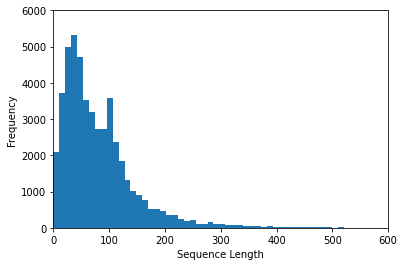

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(num_words, 100)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 600, 0, 6000])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
vocab_size = 10000
embedding_dim = 100
max_length = 200

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating='post', padding='post')

In [ ]:
print(train_padded)
print(train_padded.shape)

[[114 310 523 ...   0   0   0]
 [ 96 306 523 ...   0   0   0]
 [  6  42 364 ...   0   0   0]
 ...
 [258  37  47 ...   0   0   0]
 [507 497 308 ...   0   0   0]
 [422 465 283 ...   0   0   0]]
(48978, 200)


In [ ]:
val_sequences = tokenizer.texts_to_sequences(X_val)
val_padded = pad_sequences(val_sequences, maxlen=max_length, truncating='post', padding='post')
print(val_padded)
print(val_padded.shape)

[[ 16  50 920 ...   0   0   0]
 [ 14  47 885 ...   0   0   0]
 [248 610 107 ...   0   0   0]
 ...
 [351 120   5 ...   0   0   0]
 [ 97 223   8 ...   0   0   0]
 [ 46  86   7 ...   0   0   0]]
(20992, 200)


#### Xây dựng mô hình

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                200010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,200,021
Trainable params: 1,200,021
Non-trainable params: 0
_________________________________________________________________


#### Huấn luyện mô hình

In [ ]:
num_epochs = 10
history = model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(val_padded, y_val))

Epoch 1/10
1531/1531 [==============================] - 23s 15ms/step - loss: 0.2349 - accuracy: 0.9143 - val_loss: 0.2274 - val_accuracy: 0.9268
Epoch 2/10
1531/1531 [==============================] - 23s 15ms/step - loss: 0.0874 - accuracy: 0.9715 - val_loss: 0.3034 - val_accuracy: 0.9146
Epoch 3/10
1531/1531 [==============================] - 22s 14ms/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.4117 - val_accuracy: 0.9032
Epoch 4/10
1531/1531 [==============================] - 22s 15ms/step - loss: 0.0128 - accuracy: 0.9967 - val_loss: 0.5242 - val_accuracy: 0.9163
Epoch 5/10
1531/1531 [==============================] - 23s 15ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.6024 - val_accuracy: 0.9091
Epoch 6/10
1531/1531 [==============================] - 24s 15ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.6662 - val_accuracy: 0.9118
Epoch 7/10
1531/1531 [==============================] - 22s 15ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.7228 -

#### Đánh giá mô hình trên tập test

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating='post', padding='post')
print(val_padded)
print(val_padded.shape)

[[ 16  50 920 ...   0   0   0]
 [ 14  47 885 ...   0   0   0]
 [248 610 107 ...   0   0   0]
 ...
 [351 120   5 ...   0   0   0]
 [ 97 223   8 ...   0   0   0]
 [ 46  86   7 ...   0   0   0]]
(20992, 200)


In [ ]:
test_pred = model.predict(test_padded)
for i in range (0, len(test_pred)):
  if float(test_pred[i]) >= 0.5:
    test_pred[i] = 1
  else :
    test_pred[i] = 0
report = metrics.classification_report(y_test, test_pred, labels=[1,0], digits=3)
print(report)

              precision    recall  f1-score   support

           1      0.943     0.981     0.962      1262
           0      0.937     0.826     0.878       430

   micro avg      0.941     0.941     0.941      1692
   macro avg      0.940     0.903     0.920      1692
weighted avg      0.941     0.941     0.940      1692



In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights)

[[-0.00120418 -0.02875787 -0.00252464 ...  0.00165198 -0.01072667
   0.00296611]
 [-0.0689681   0.18968406 -0.10935988 ...  0.1795112  -0.11538295
  -0.13056938]
 [ 0.09202734 -0.11411255 -0.16944797 ... -0.04321887 -0.05968783
   0.16656914]
 ...
 [ 0.01544627 -0.0150977  -0.03737238 ... -0.0179678  -0.07237411
  -0.07117707]
 [ 0.14781871 -0.0349051  -0.15298496 ...  0.11863214 -0.16391505
   0.01113571]
 [ 0.02065273  0.00745208  0.02752207 ... -0.03918453 -0.03210275
  -0.10093365]]


#### Mô hình hóa Word2vec trong không gian 3 chiều 

In [ ]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for i in range(1, vocab_size):
  word = tokenizer.index_word[i]
  vector = weights[i]
  out_m.write(word + "\n")
  out_v.write("\t".join([str(x) for x in vector ]) + "\n")

out_m.close()
out_v.close()


## **Xử lý dữ liệu mất cân bằng**
Có một hướng tiếp cận được gọi là ‘**Resampling**’ để hai classes có lượng dữ liệu tương đối như nhau. 
1. Cách thứ nhất là **UNDER-sampling**, tức chỉ chọn ra vài phần tử của class trội hơn và kết hợp với class còn lại để làm dữ liệu training. 

2. Cách thứ hai là **OVER-sampling**, tức có thể lặp lại dữ liệu, hoặc tìm cách kết hợp để tạo ra dữ liệu mới, của class ít hơn, và kết hợp với class còn lại để làm dữ liệu training.

### **Undersampling**

Kiểm tra số lượng của tập nhỏ hơn

In [ ]:
minority_class_len = len(df[df["ratings"] == 0])
print(minority_class_len)

8366


In [ ]:
majority_class_indices = df[df["ratings"] == 1].index
print(majority_class_indices)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     9,
               10,
            ...
            34973, 34974, 34975, 34976, 34977, 34978, 34979, 34980, 34981,
            34982],
           dtype='int64', length=26619)


Chọn ngẫu nhiên các bình luận trong tập lớn với số lượng bằng với số lượng tập nhỏ 

In [ ]:
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)
print(len(random_majority_indices))

8366


In [ ]:
minority_class_indices = df[df["ratings"] == 0].index
print(minority_class_indices)

Int64Index([    8,    12,    13,    14,    16,    19,    29,    33,    49,
               66,
            ...
            34955, 34956, 34958, 34960, 34961, 34967, 34971, 34972, 34983,
            34984],
           dtype='int64', length=8366)


Kết hợp 2 tập lớn mới mà tập nhỏ ta có được 1 dataset cân bằng hơn dataset cũ. Từ đó, ta chạy lại các thuật toán máy học để đánh giá kết quả

In [ ]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])
under_sample = df.loc[under_sample_indices]
print(under_sample)


                                                comments  ratings
8      Đã tới ăn , vị ổn , nhưng mình tưởng như hình ...        0
12     Bánh tráng cuộn thịt heo quá mắc, giá bán 63k ...        0
13     Mình chỉ order về 2 món: nộm bò với mì quảng -...        0
14       Book foody , quán đóng gói sạch sẽ, ăn khá ngon        0
16     Quán ăn ngon, phục vụ tốt, sạch sẽ. Decor quán...        0
...                                                  ...      ...
8161   Quán này làm theo phong cách hơi hướm xưa cổ, ...        1
577    Chú chuyển về 340 Tôn Đản quận 4 rồi nha mọi n...        1
2595   Hôm qua tối ghé mua mang đi, ngay thứ bảy ngườ...        1
4309   Mình có quen bà chị chủ ở đây vì ăn đến nhẵn m...        1
14188  Mình được bạn dẫn đến đây ăn shushi tiếc là mì...        1

[16732 rows x 2 columns]


In [ ]:
undersampling_X_train, undersampling_X_val, undersampling_y_train, undersampling_y_val = train_test_split(under_sample["comments"], under_sample["ratings"], test_size=0.3, random_state=42)
undersampling_X_train, undersampling_y_train = transform_to_dataset(undersampling_X_train, undersampling_y_train)
undersampling_X_val, undersampling_y_val = transform_to_dataset(undersampling_X_val, undersampling_y_val)

In [ ]:
tf_undersampling = TfidfVectorizer()
tf_undersampling.fit(undersampling_X_train)
print(len(tf_undersampling.vocabulary_))
undersampling_vector_train = tf_undersampling.transform(undersampling_X_train)
undersampling_vector_val = tf_undersampling.transform(undersampling_X_val)

print (tf_undersampling.vocabulary_)
print (tf_undersampling.idf_)

26354
{'đến': 25886, 'đây': 25488, 'trong': 21731, 'một': 13621, 'tối': 22949, 'không': 10550, 'dự_định': 7385, 'đi': 25278, 'ăn': 25107, 'món': 13332, 'miền': 12908, 'tây': 22562, 'nhưng': 15279, 'bị': 2983, 'quán': 17407, 'thuyết_phục': 20376, 'dã_man': 7105, 'luôn': 11793, 'positive': 17002, 'đồ': 25980, 'ngon': 14183, 'phục_vụ': 16923, 'vừa': 24046, 'nhanh': 14839, 'dễ_thương': 7290, 'menu': 12775, 'sao': 18308, 'thực_tế': 20914, 'vậy': 23946, 'nhất_định': 15325, 'quay': 17262, 'lại': 12157, 'còn': 5473, 'thêm': 20495, 'bánh': 2511, 'khọt': 10622, 'và': 23718, 'nem': 13836, 'cuốn': 5317, 'tôm': 22657, 'nữa': 16165, 'cơ_mà': 5617, 'quên_béng': 17442, 'hem': 8692, 'chụp': 4696, 'rùi': 18018, 'vị': 23986, 'bát': 2591, 'bún': 2746, 'hải_sản': 9621, 'chua_ngọt': 4097, 'như': 15261, 'kiểu': 10831, 'yum': 24857, 'chan': 3611, 'với': 24023, 'bạn': 2812, 'mình': 13314, 'bảo': 2834, 'thế': 20747, 'vẫn': 23931, 'nhắm': 15362, 'thịt_nướng': 20795, 'trộn': 22172, 'hơn': 9564, 'hẳn': 9666, 'nét'

In [ ]:
#Try some models
classifiers = [
            #MultinomialNB(),
            DecisionTreeClassifier(),
            LogisticRegression(),
            LinearSVC(),
        ]
for classifier in classifiers:
    model = classifier
    model.fit(undersampling_vector_train, undersampling_y_train)
    undersampling_y_pred = model.predict(undersampling_vector_val)
    report = metrics.classification_report(undersampling_y_val, undersampling_y_pred, labels=[1,0], digits=3)
    print(report)


              precision    recall  f1-score   support

           1      0.777     0.784     0.780      4934
           0      0.789     0.782     0.786      5106

   micro avg      0.783     0.783     0.783     10040
   macro avg      0.783     0.783     0.783     10040
weighted avg      0.783     0.783     0.783     10040



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1      0.889     0.918     0.903      4934
           0      0.918     0.889     0.903      5106

   micro avg      0.903     0.903     0.903     10040
   macro avg      0.904     0.904     0.903     10040
weighted avg      0.904     0.903     0.903     10040

              precision    recall  f1-score   support

           1      0.886     0.900     0.893      4934
           0      0.902     0.888     0.895      5106

   micro avg      0.894     0.894     0.894     10040
   macro avg      0.894     0.894     0.894     10040
weighted avg      0.894     0.894     0.894     10040



#### Train overfitting

In [ ]:
classifiers = [
            #MultinomialNB(),
            DecisionTreeClassifier(),
            LogisticRegression(),
            LinearSVC(),
        ]
for classifier in classifiers:
    model = classifier
    model.fit(undersampling_vector_train, undersampling_y_train)
    undersampling_y_pred = model.predict(undersampling_vector_train)
    report = metrics.classification_report(undersampling_y_train, undersampling_y_pred, labels=[1,0], digits=3)
    print(report)

              precision    recall  f1-score   support

           1      0.999     1.000     1.000     11798
           0      1.000     0.999     1.000     11626

   micro avg      1.000     1.000     1.000     23424
   macro avg      1.000     1.000     1.000     23424
weighted avg      1.000     1.000     1.000     23424



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           1      0.919     0.947     0.933     11798
           0      0.944     0.916     0.930     11626

   micro avg      0.931     0.931     0.931     23424
   macro avg      0.932     0.931     0.931     23424
weighted avg      0.932     0.931     0.931     23424

              precision    recall  f1-score   support

           1      0.955     0.981     0.968     11798
           0      0.980     0.953     0.966     11626

   micro avg      0.967     0.967     0.967     23424
   macro avg      0.967     0.967     0.967     23424
weighted avg      0.967     0.967     0.967     23424



#### Error Analysis

### Oversampling

Sử dụng kỹ thuật SMOTE

## **Deploy to the website** 

In [ ]:
app = Flask(__name__, template_folder=r'/content/drive/My Drive/Colab Notebooks/sentiment_analysis')
run_with_ngrok(app)  # Start ngrok when app is run


@app.route("/")
def home():
    return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():
    if request.method == 'POST':
        message = request.form['message']
        data = [message]
        data = normalize_text(data)
        data = [data]
        data = tf.transform(data)
        my_prediction = int(model[2].predict(data))
    return render_template('result.html',prediction = my_prediction)

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5ac8076c8720.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [20/Jul/2020 05:55:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 05:55:32] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 05:55:34] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 05:56:02] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 05:56:03] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 05:56:14] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 05:56:14] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 05:58:07] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 05:58:08] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 05:58:31] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 05:58:31] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 05:58:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2020 05:58:38] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 05:59:40] "GET / HTTP/1.1" 200 -
127.0.0